In [386]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")


import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import cluster 




In [387]:
# DATA PREPARATION 
df = pd.read_csv('C:/creditcard.csv')
df.shape
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [388]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [389]:
df.describe() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [390]:
#Checking for NULL Values
df.isnull().sum().sort_values(ascending=False).head()  


MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE                  0
dtype: int64

In [391]:
##314 missing data were detected from 8950 data. This 3.5% does not require deleting the missing data.
#It is appropriate to write mean instead of missing data.

df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [392]:
df.drop(['CUST_ID'], axis=1, inplace=True)

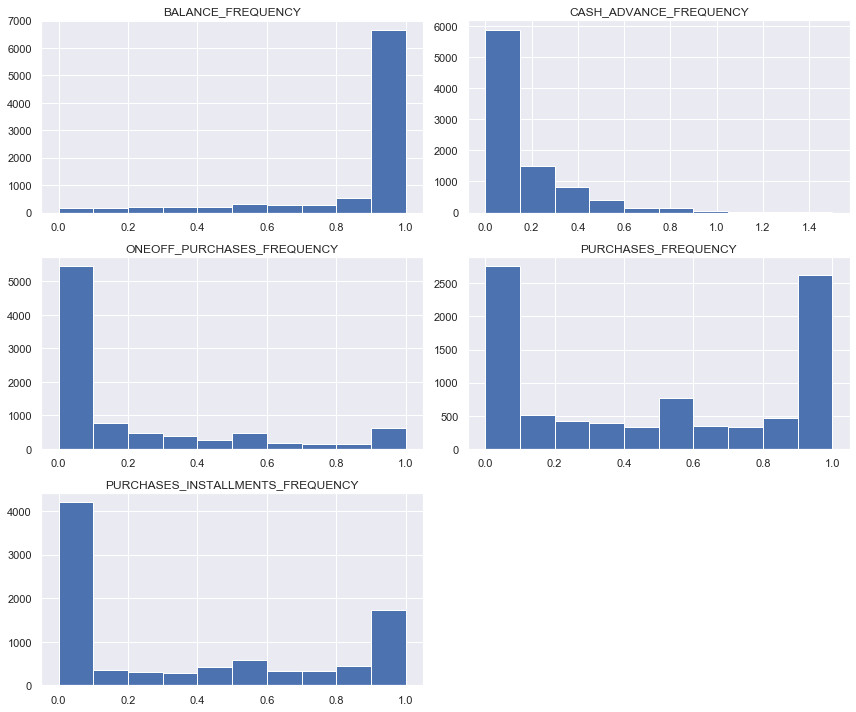

In [393]:
#A check on vriables

df[[                           
'BALANCE_FREQUENCY',                                                         
'PURCHASES_FREQUENCY',                 
'ONEOFF_PURCHASES_FREQUENCY',          
'PURCHASES_INSTALLMENTS_FREQUENCY' ,  
'CASH_ADVANCE_FREQUENCY' ]].hist(figsize=(12,10))
plt.tight_layout()

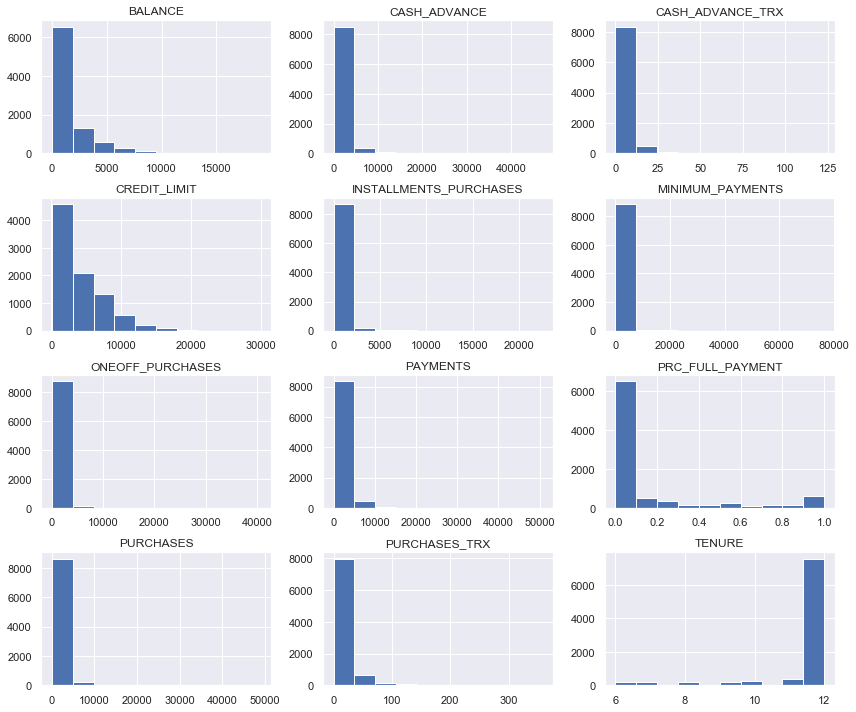

In [394]:
df[['BALANCE',                                               
'PURCHASES',                          
'ONEOFF_PURCHASES',                
'INSTALLMENTS_PURCHASES',          
'CASH_ADVANCE',                        
'CASH_ADVANCE_TRX',                    
'PURCHASES_TRX' ,                      
'CREDIT_LIMIT',                        
'PAYMENTS' ,                           
'MINIMUM_PAYMENTS',                 
'PRC_FULL_PAYMENT'  ,                  
'TENURE']].hist(figsize=(12,10))
plt.tight_layout()

In [395]:
#Overview about Outliers

cols = list(df)
irq_score = {}

for c in cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    score = q3 - q1
    outliers = df[(df[c] < q1 - 1.5 * score) | (df[c] > q3 + 1.5 * score)][c]
    values = df[(df[c] >= q1 - 1.5 * score) | (df[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

# IQR = Q3 − Q1
#Since deletion of outliers will cause data loss, for it will be clustered without deletion. Also, my aim is to define clusters within data rthym itself.

,Q1,Q3,IRQ,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
BALANCE,128.281915,2054.140036,1925.858120,695,7183.206924,2193.426633,6533.312256,1564.474828,2081.531879,873.385231
BALANCE_FREQUENCY,0.888889,1.000000,0.111111,1493,0.396616,0.194740,0.454545,0.877271,0.236904,1.000000
PURCHASES,39.635000,1110.130000,1070.495000,808,5662.898193,4739.024603,4220.550000,1003.204834,2136.634782,361.280000
ONEOFF_PURCHASES,0.000000,577.405000,577.405000,1013,3546.976594,3678.788638,2475.930000,592.437371,1659.887917,38.000000
INSTALLMENTS_PURCHASES,0.000000,468.637500,468.637500,867,2364.116021,1857.838527,1800.000000,411.067645,904.338115,89.000000
CASH_ADVANCE,0.000000,1113.821139,1113.821139,1030,5446.979628,3470.164991,4325.290526,978.871112,2097.163877,0.000000
PURCHASES_FREQUENCY,0.083333,0.916667,0.833334,0,NaN,NaN,NaN,0.490351,0.401371,0.500000
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.300000,0.300000,782,0.952398,0.065798,1.000000,0.202458,0.298336,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000,0.750000,0.750000,0,NaN,NaN,NaN,0.364437,0.397448,0.166667
CASH_ADVANCE_FREQUENCY,0.000000,0.222222,0.222222,525,0.710399,0.137328,0.666667,0.135144,0.200121,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

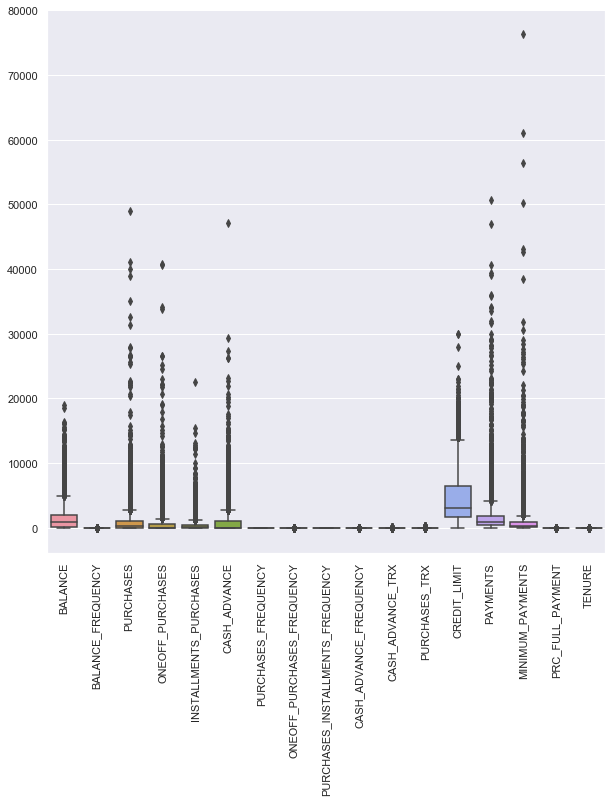

In [396]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)


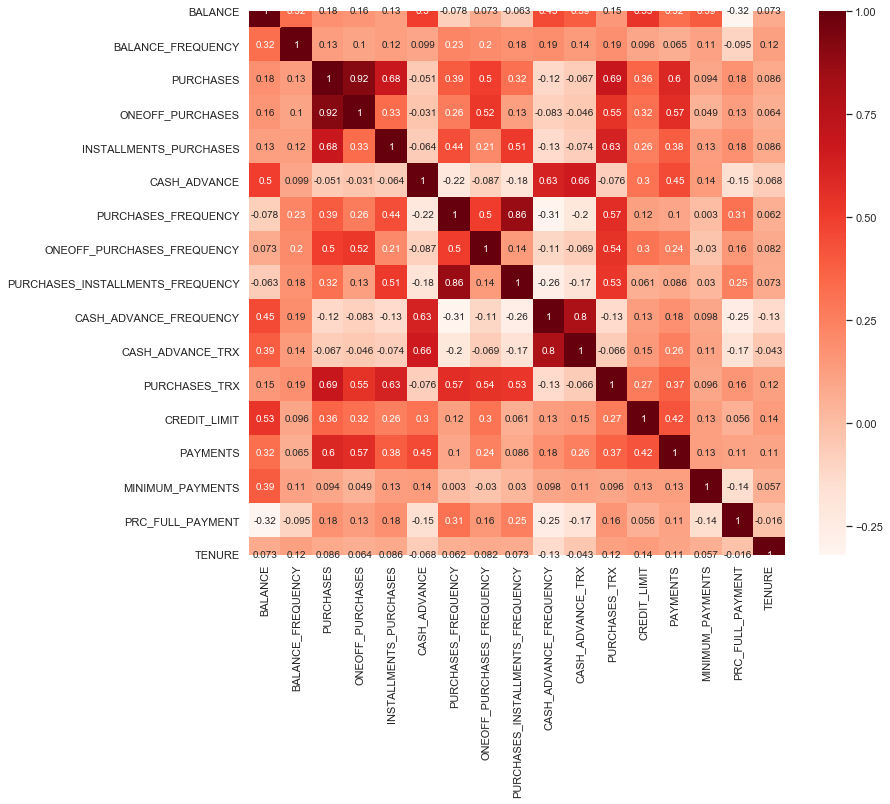

In [397]:
#We see the relationship between the correlation matrix and variables. As their proportion approaches 1
#We can say that they are in the right proportion with each other.

plt.figure(figsize=(12,10))
cor =df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()     

In [398]:
##standardization

from sklearn import preprocessing


# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=names)
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

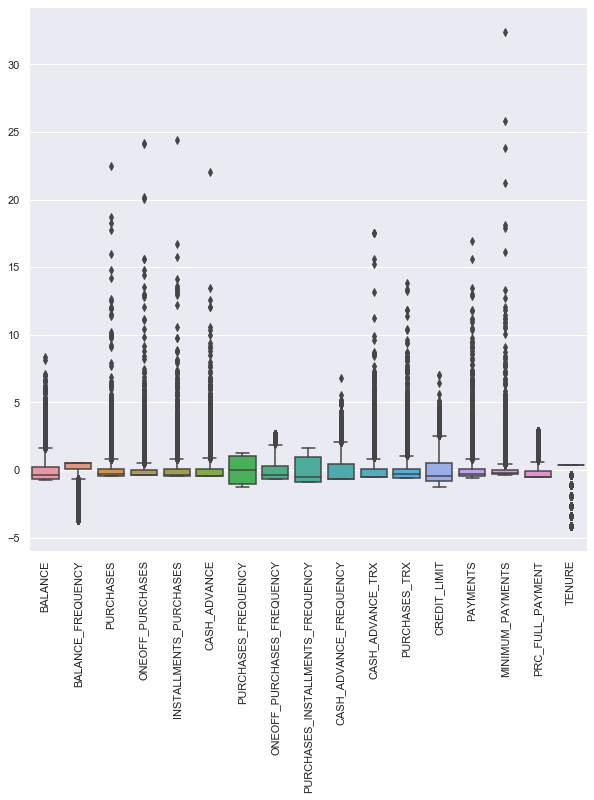

In [399]:
#In standardized data, z scores are written to variable values. As can be seen, the range of variables has decreased.

plt.figure(figsize=(10,10))
sns.boxplot(data=df_std)
plt.xticks(rotation=90)

In [400]:
#CLUSTERING MODELS
# 1.k-Means

n_clusters = 10

clustering = KMeans(n_clusters=n_clusters,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(df_std)



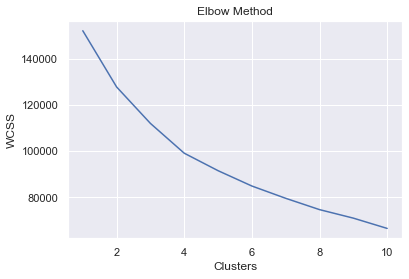

In [401]:
#Determining Number of Clusters with Elbow Method

#In this method, choosing 4 clusters seems to be correct.
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [402]:
#Determining Number of Clusters with Silhouette Scores Method

#highest score in 3 clusters. However, around 6-7-8 clusters can also be applied.

"""I checked the silhouette points to make a decision. Although the 3rd cluster model gave the highest score, 
I thought somewhere in the 6th, 7th and 8th clusters.""""


silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()


SyntaxError: EOL while scanning string literal (<ipython-input-402-97e6c6f3b3d6>, line 6)

In [ ]:
#Kmeans with Different Number of Clusters from 2 to 20

kmeans_values=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

In [ ]:
#2.Hierarchical Clustering

siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [ ]:
df_hierarchical.sort_values('sil_score', ascending=False)

""""also would like to check further values in this method as below.
I could catch similar value of %70 in 8 cluster model. Due to the results, 
I choose linkage_method :average , number of cluster:8 The silhouette score of the Agglomerative Clustering solution: 0.7095"""

In [ ]:
plt.figure(figsize=(15,10)) 
plt.title("Dendrogram with Linkage Method: Average") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(normalized_df, method='average')) 
plt.show() 

In [ ]:
#3.DBSCAN

#Until around 8000th variable eps is under 2. density is too much in the general data set Here we can also see.

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_std)
distances, indices = nbrs.kneighbors(df_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,2,0.2):
    for min_sample in range(1,10):
        dbscan = DBSCAN(eps=eps, min_samples= min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [ ]:
df_dbscan.sort_values('sil_score', ascending=False).head()

In [ ]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [ ]:
df_dbscan.sort_values('sil_score', ascending=False).tail()

""""Even though, checking the silhouette score to choose the best DBSCAN metric does not give the best model 
for our data set. This method seems not a suitable one for our desired model even with a high silhouette score. 
The reason behind this is that we have a high number of variables in the same cluster itself but distribution 
of variables does not distributes homogenous in all clusters.

""""

In [ ]:
#Compering Results for the Optimal Number of Cluster Model

kmeans_      = KMeans(n_clusters=8, random_state=40).fit_predict(df_std)

hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=8).fit_predict(df_std)

dbscan       = DBSCAN(eps=9.5, min_samples=1).fit_predict(df_std)

In [ ]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')
DBSCAN_Silhouette_Score       = metrics.silhouette_score(df_std, dbscan, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(df_std, hierarchical_, metric='euclidean')


In [ ]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ],
                                ['Hierarchical',Hierarchical_Silhouette_Score ],
                                ['DBSCAN', DBSCAN_Silhouette_Score]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

In [ ]:

df['cluster'] = dbscan 
df['cluster'].value_counts()

In [ ]:
df['cluster'] = hierarchical_ 
df['cluster'].value_counts()

""""Clearly, density is very much in the first cluster and lower number of variables in other clusters.
However, checking cluster numbers and distribution of variables in each cluster shows that this method is not convenient for this data set.
I continued with Kmeans. In the following sections, we can see the difference in two choices of kmeans models.""""

In [ ]:
kmeans_ = KMeans(n_clusters=8, random_state=40).fit(df_std)

df['cluster'] = kmeans_.labels_


In [ ]:
kmeans4_  = KMeans(n_clusters=4, random_state=40).fit(df_std)
df['cluster'] = kmeans4_.labels_
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
           'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY' , 
           'CASH_ADVANCE_FREQUENCY' , 'CASH_ADVANCE_TRX',  'PURCHASES_TRX' , 'CREDIT_LIMIT','PAYMENTS' ,                           
           'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'  ,'TENURE' ] 


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,4,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

In [ ]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

In [ ]:
kmeans6_  = KMeans(n_clusters=6, random_state=40).fit(df_std)
df['cluster'] = kmeans6_.labels_
col_list= ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS" ]                            

for column in col_list:
    plt.figure(figsize=(18,5))
    for i in range(0,6):
        plt.subplot(1,6,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

In [ ]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

In [ ]:
kmeans8_  = KMeans(n_clusters=8, random_state=40).fit(df_std)
df['cluster'] = kmeans8_.labels_
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
           'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY' , 
           'CASH_ADVANCE_FREQUENCY' , 'CASH_ADVANCE_TRX',  'PURCHASES_TRX' , 'CREDIT_LIMIT','PAYMENTS' ,                           
           'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'  ,'TENURE' ] 


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,8):
        plt.subplot(1,8,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

In [ ]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")


In [ ]:
# PCA 2 dimensions 

pca = PCA(n_components=2).fit(df_std)

df_pca2 = pca.fit_transform(df_std)
print("original shape:   ", df_std.shape)
print("transformed shape:", df_pca2.shape)

In [ ]:
#Result in a DataFrame

df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['A1', 'A2']
df_pca.head()

In [ ]:
print(pca.explained_variance_)

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

In [ ]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c= KMeans(n_clusters=4, random_state=40).fit_predict(umap_results), cmap =None) 
plt.show()

In [ ]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c= KMeans(n_clusters=6, random_state=40).fit_predict(umap_results), cmap =None) 
plt.show()

In [ ]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c = KMeans(n_clusters=8, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

#it is obvious that when there are 8 sets, the sets in the data are more discrete and meaningful.So I decided to continue with 8 sets.

In [ ]:
df.head(20)

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(df["cluster"])
plt.title('Customer per cluster',fontsize=18)
plt.xlabel("Cluster Case",fontsize=15)
plt.ylabel("Count",fontsize=15)


In [ ]:
x, y = df_pca2 [:, 0], df_pca2 [:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple',
          6: 'pink',
          7: 'black'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         4: 'Cluster 4',
         5: 'Cluster 5',
         6: 'Cluster 6',
         7: 'Cluster 7'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':df['cluster']}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 15)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")

In [ ]:
""""
CONCLUSION

Compering 3 different Kmeans Models showed that we have a better understanding of customer 
segmentation by using the 8 clusters model. Some of the outstanding results:

Cluster 0: This customer group represents a small group of customers who spend small with the lowest 
minimum payment and balance.

Cluster 1: This group makes purchases in low amounts but with high frequency. The highest installment 
purchases frequency is in this group.

Cluster 2: This group points to new customers with the lowest credit limit ,average balance level and 
less frequent purchases.

Cluster 3: This cluster targets a group of customers with high balance and cash advances. This group also 
has a low purchase frequency. We can assume that this customer segment uses credit cards as credit.

Cluster 4:  The group of customers with the highest credit limit and the highest purchase amount. 
Purchase frequencies and balances are also high. This group that uses the credit card most actively is
the smallest group of customers.

Cluster 5: The cluster with the lowest installment purchase and full payment percentage. 
The most customers are in this group.

Cluster 6: The purchase frequency of customers is high but the minimum payment amounts are low. 
Installment purchases and installment purchases are at medium level.

Cluster 7: Customers with the highest balance, purchase frequency and minimum payment. 
Credit card limits and purchase amounts are at an average level. They often make their purchases in installments.


""""